In [100]:
import pandas as pd

df=pd.read_csv(r'C:\Users\lenovo\Desktop\Polytech\Data Mining\Projet\Data\objects.csv', low_memory=False)

df.head(10)

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18
5,c:10002,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,...,NaN,0,0.0,NaN,NaN,0,2,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19
6,c:10003,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20
7,c:100042,Company,100042,NaN,HostNine,hostnine,/company/hostnine,NaN,operating,NaN,...,NaN,0,0.0,2011-06-20,2011-06-20,1,1,NaN,2011-09-07 00:53:17,2011-12-20 09:09:53
8,c:10005,Company,10005,NaN,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,NaN,...,NaN,0,0.0,1999-06-01,1999-06-01,1,2,NaN,2008-08-24 20:21:21,2009-11-19 17:21:00
9,c:100062,Company,100062,NaN,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,2011-08-01,...,NaN,0,0.0,2011-08-01,2011-08-01,1,2,dmurtagh,2011-09-07 01:04:56,2011-09-24 13:13:18


In [102]:
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,entity_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
entity_id,1.000000,-0.068609,-0.037528,-0.144841,-0.144822,-0.042499,-0.042868,0.024889,0.025245
logo_width,-0.068609,1.000000,0.833257,0.034404,0.034381,0.231242,0.211861,0.134109,0.141526
logo_height,-0.037528,0.833257,1.000000,0.017604,0.017582,0.165342,0.150032,0.084394,0.171247
investment_rounds,-0.144841,0.034404,0.017604,1.000000,0.999320,-0.040115,-0.036765,-0.011987,-0.021429
invested_companies,-0.144822,0.034381,0.017582,0.999320,1.000000,-0.040126,-0.036776,-0.011985,-0.021456
funding_rounds,-0.042499,0.231242,0.165342,-0.040115,-0.040126,1.000000,0.920934,0.233941,0.157607
funding_total_usd,-0.042868,0.211861,0.150032,-0.036765,-0.036776,0.920934,1.000000,0.218800,0.155143
milestones,0.024889,0.134109,0.084394,-0.011987,-0.011985,0.233941,0.218800,1.000000,0.268889
relationships,0.025245,0.141526,0.171247,-0.021429,-0.021456,0.157607,0.155143,0.268889,1.000000


In [89]:
df = df[['category_code', 'status','country_code', 'state_code', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships']]

In [90]:
df.dropna(inplace=True)
df.head()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
0,web,operating,USA,WA,0,0,3,39750000.0,5,17
1,games_video,acquired,USA,CA,0,0,0,0.0,0,6
2,games_video,acquired,USA,CA,0,0,0,0.0,4,12
8,advertising,operating,USA,NY,0,0,0,0.0,1,2
12,advertising,operating,USA,NM,0,0,0,0.0,1,2


In [91]:
d= {df['category_code'].values[i]:i for i in range(len(df['category_code'].values))}
df['category_code'] = [d[x] for x in df['category_code']]
d= {df['country_code'].values[i]:i for i in range(len(df['country_code'].values))}
df['country_code'] = [d[x] for x in df['country_code']]
d= {df['state_code'].values[i]:i for i in range(len(df['state_code'].values))}
df['state_code'] = [d[x] for x in df['state_code']]

In [92]:
df['status'].replace({'operating':2, 'closed':0, 'acquired':1, 'ipo':1}, inplace=True)

In [93]:
df.corr(method ='pearson')

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
category_code,1.000000,-0.044010,-0.006352,0.013097,0.001540,0.001372,-0.073822,-0.030323,0.060267,0.010347
status,-0.044010,1.000000,-0.003387,-0.014730,-0.008151,-0.006893,-0.101242,-0.052296,-0.136638,-0.086583
country_code,-0.006352,-0.003387,1.000000,0.021730,0.000643,0.000601,0.011637,-0.000693,-0.001653,0.003404
state_code,0.013097,-0.014730,0.021730,1.000000,0.001570,0.001198,0.026583,0.016025,0.066731,0.024653
investment_rounds,0.001540,-0.008151,0.000643,0.001570,1.000000,0.998581,0.007608,0.010825,0.049343,0.127440
invested_companies,0.001372,-0.006893,0.000601,0.001198,0.998581,1.000000,0.007491,0.009411,0.046762,0.116988
funding_rounds,-0.073822,-0.101242,0.011637,0.026583,0.007608,0.007491,1.000000,0.294130,0.322729,0.156519
funding_total_usd,-0.030323,-0.052296,-0.000693,0.016025,0.010825,0.009411,0.294130,1.000000,0.135796,0.134747
milestones,0.060267,-0.136638,-0.001653,0.066731,0.049343,0.046762,0.322729,0.135796,1.000000,0.280471
relationships,0.010347,-0.086583,0.003404,0.024653,0.127440,0.116988,0.156519,0.134747,0.280471,1.000000


In [95]:
df.corr(method='kendall')

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
category_code,1.000000,-0.013943,-0.004692,0.014125,-0.016607,-0.016600,-0.166201,-0.162359,0.048710,-0.013138
status,-0.013943,1.000000,-0.012242,-0.039998,-0.079830,-0.079827,-0.108035,-0.108940,-0.115303,-0.118677
country_code,-0.004692,-0.012242,1.000000,0.033721,0.005417,0.005416,0.024994,0.023882,0.015399,0.026003
state_code,0.014125,-0.039998,0.033721,1.000000,0.006018,0.006022,0.048592,0.043615,0.107075,0.084955
investment_rounds,-0.016607,-0.079830,0.005417,0.006018,1.000000,0.999710,-0.024812,-0.014301,0.089712,0.095452
invested_companies,-0.016600,-0.079827,0.005416,0.006022,0.999710,1.000000,-0.024812,-0.014301,0.089717,0.095464
funding_rounds,-0.166201,-0.108035,0.024994,0.048592,-0.024812,-0.024812,1.000000,0.840298,0.196586,0.327192
funding_total_usd,-0.162359,-0.108940,0.023882,0.043615,-0.014301,-0.014301,0.840298,1.000000,0.172402,0.309055
milestones,0.048710,-0.115303,0.015399,0.107075,0.089712,0.089717,0.196586,0.172402,1.000000,0.491783
relationships,-0.013138,-0.118677,0.026003,0.084955,0.095452,0.095464,0.327192,0.309055,0.491783,1.000000


In [7]:
df.drop(df.loc[df['status']==2].index, inplace=True)
df.head()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
1,46646,1,46654,46654,0,0,0,0.0,0,6
2,46646,1,46654,46654,0,0,0,0.0,4,12
13,46647,1,46654,46654,0,0,1,5000000.0,3,14
18,46645,1,46654,46654,0,0,1,0.0,4,9
56,46646,1,46654,46640,0,0,0,0.0,3,2


In [8]:
df.corr()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
category_code,1.000000,-0.003429,-0.005530,0.004241,-0.000103,-0.000369,-0.080457,-0.039601,0.013580,0.004820
status,-0.003429,1.000000,0.033265,-0.001035,0.042524,0.043376,-0.100782,0.034708,0.104563,0.073845
country_code,-0.005530,0.033265,1.000000,0.025638,0.002461,0.002522,-0.000812,-0.010957,-0.015500,0.002254
state_code,0.004241,-0.001035,0.025638,1.000000,0.011565,0.011037,0.064429,0.014424,0.102594,0.027962
investment_rounds,-0.000103,0.042524,0.002461,0.011565,1.000000,0.995288,-0.013151,0.042975,0.139090,0.496816
invested_companies,-0.000369,0.043376,0.002522,0.011037,0.995288,1.000000,-0.013288,0.041200,0.138645,0.511868
funding_rounds,-0.080457,-0.100782,-0.000812,0.064429,-0.013151,-0.013288,1.000000,0.262099,0.321591,0.056511
funding_total_usd,-0.039601,0.034708,-0.010957,0.014424,0.042975,0.041200,0.262099,1.000000,0.115127,0.106975
milestones,0.013580,0.104563,-0.015500,0.102594,0.139090,0.138645,0.321591,0.115127,1.000000,0.274405
relationships,0.004820,0.073845,0.002254,0.027962,0.496816,0.511868,0.056511,0.106975,0.274405,1.000000


In [9]:
import numpy as np
df['rel_log'] = np.log(df['relationships'])

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log
1,46646,1,46654,46654,0,0,0,0.0,0,6,1.791759
2,46646,1,46654,46654,0,0,0,0.0,4,12,2.484907
13,46647,1,46654,46654,0,0,1,5000000.0,3,14,2.639057
18,46645,1,46654,46654,0,0,1,0.0,4,9,2.197225
56,46646,1,46654,46640,0,0,0,0.0,3,2,0.693147


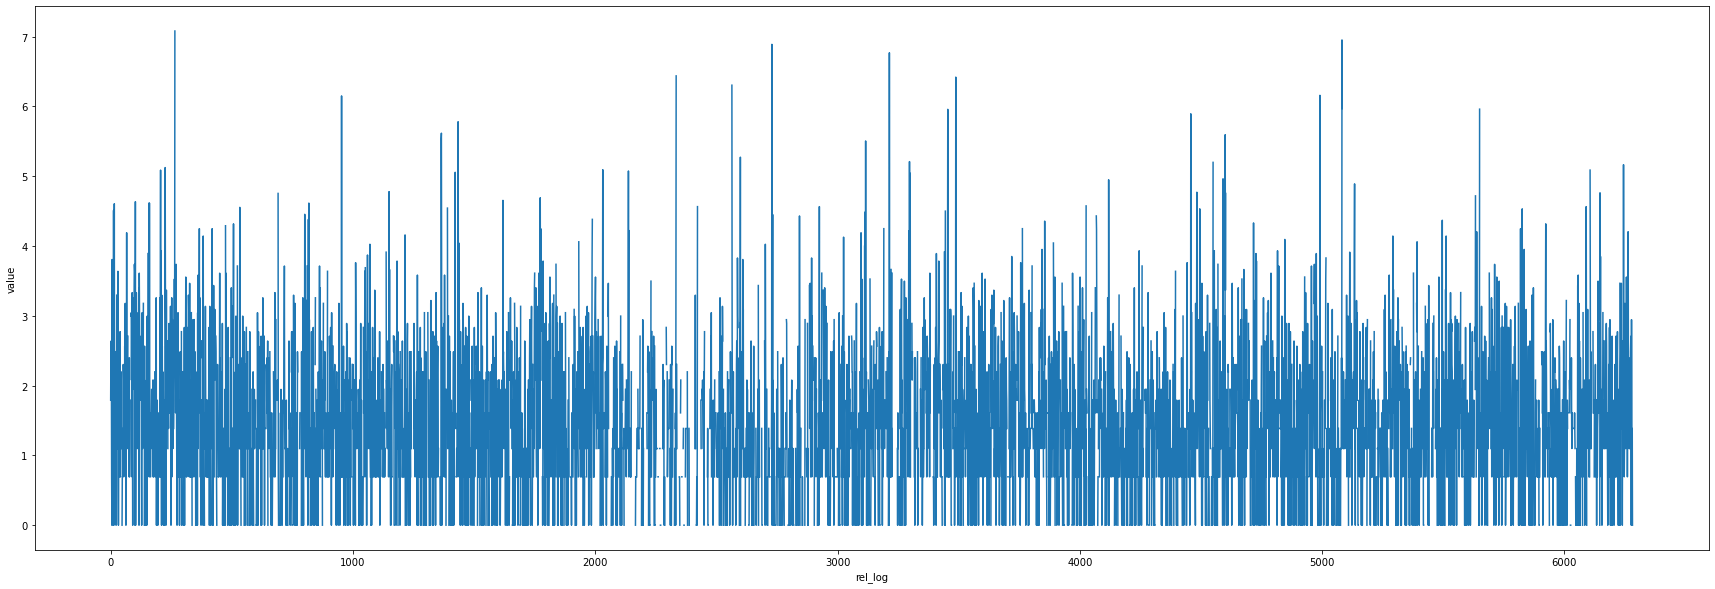

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
plt.xlabel('rel_log')
plt.ylabel('value')
sns.lineplot(y=df['rel_log'], x=[i for i in range(len(df['rel_log']))])
plt.show()


<AxesSubplot:>

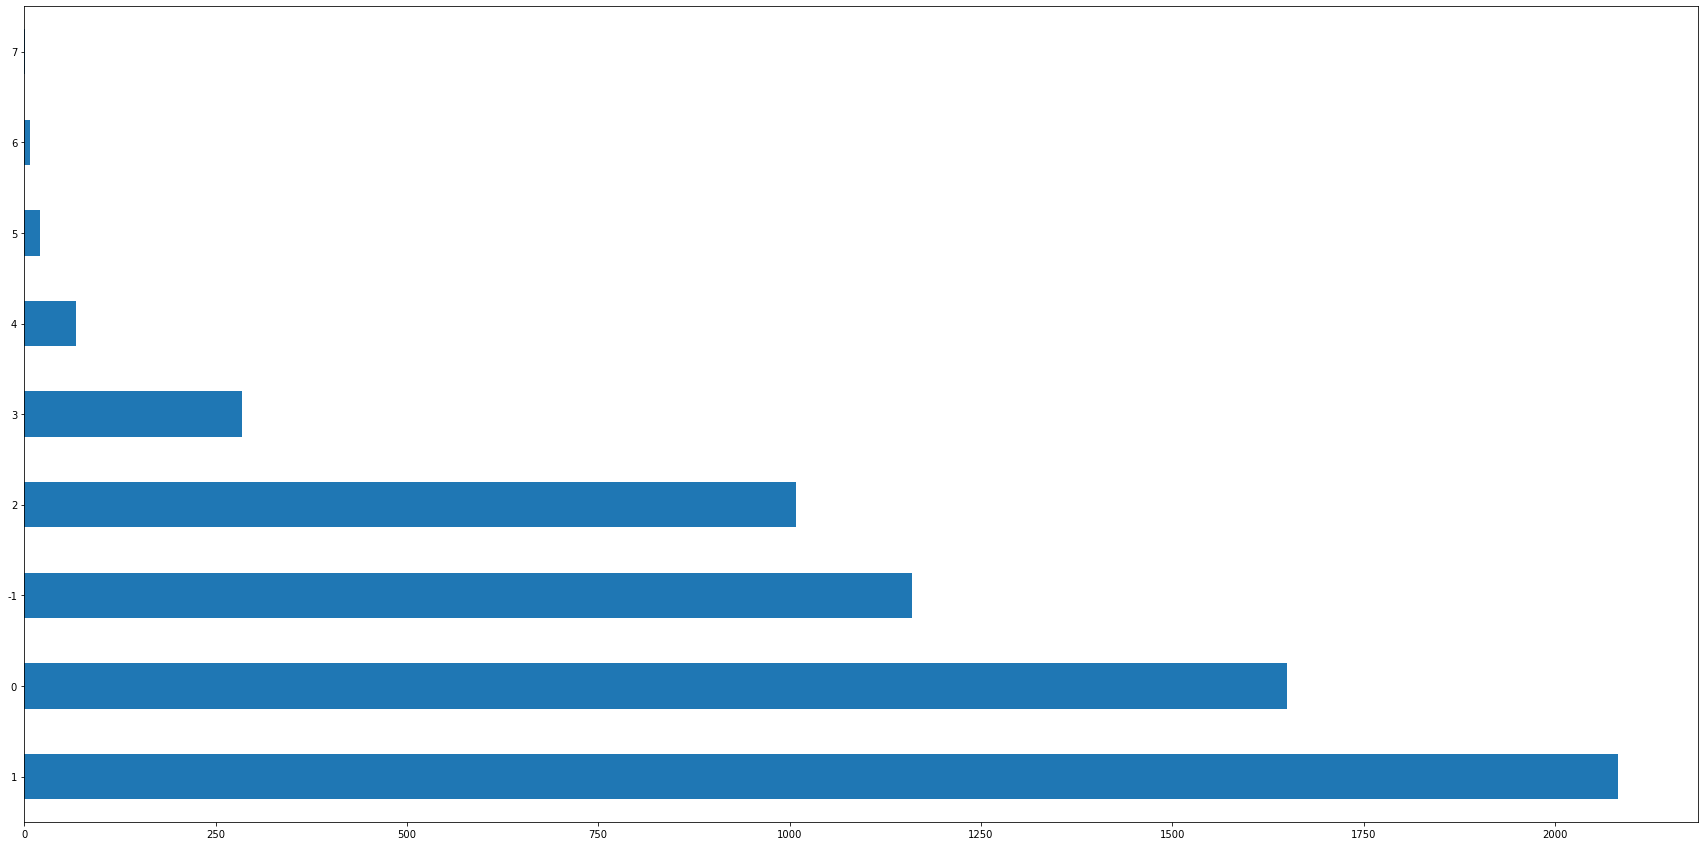

In [11]:
df['rel_log'].replace({-float('inf'):-1}, inplace=True)
df["rel_log"] = df["rel_log"].apply(np.int64)
df['rel_log'].value_counts().plot(kind='barh', figsize=(30,15))

In [12]:
df.corr()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log
category_code,1.000000,-0.003429,-0.005530,0.004241,-0.000103,-0.000369,-0.080457,-0.039601,0.013580,0.004820,-0.020905
status,-0.003429,1.000000,0.033265,-0.001035,0.042524,0.043376,-0.100782,0.034708,0.104563,0.073845,0.144959
country_code,-0.005530,0.033265,1.000000,0.025638,0.002461,0.002522,-0.000812,-0.010957,-0.015500,0.002254,0.004228
state_code,0.004241,-0.001035,0.025638,1.000000,0.011565,0.011037,0.064429,0.014424,0.102594,0.027962,0.091045
investment_rounds,-0.000103,0.042524,0.002461,0.011565,1.000000,0.995288,-0.013151,0.042975,0.139090,0.496816,0.232910
invested_companies,-0.000369,0.043376,0.002522,0.011037,0.995288,1.000000,-0.013288,0.041200,0.138645,0.511868,0.236635
funding_rounds,-0.080457,-0.100782,-0.000812,0.064429,-0.013151,-0.013288,1.000000,0.262099,0.321591,0.056511,0.313454
funding_total_usd,-0.039601,0.034708,-0.010957,0.014424,0.042975,0.041200,0.262099,1.000000,0.115127,0.106975,0.150069
milestones,0.013580,0.104563,-0.015500,0.102594,0.139090,0.138645,0.321591,0.115127,1.000000,0.274405,0.615223
relationships,0.004820,0.073845,0.002254,0.027962,0.496816,0.511868,0.056511,0.106975,0.274405,1.000000,0.440845


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

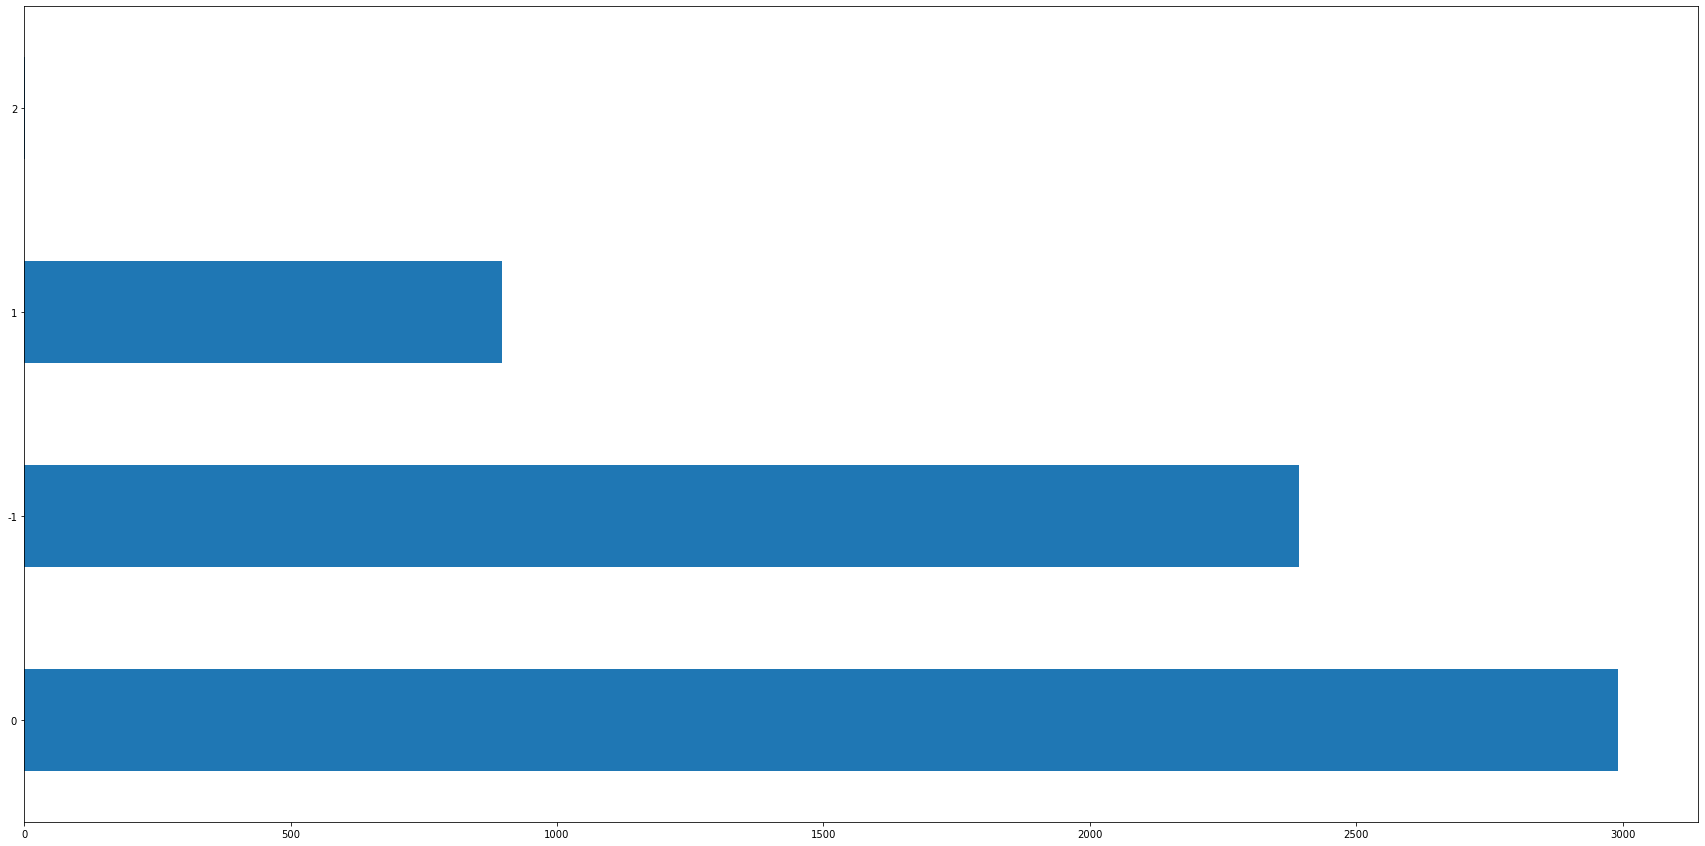

In [13]:
df['mls_log'] = np.log(df['milestones'])
df['mls_log'].replace({-float('inf'):-1}, inplace=True)
df["mls_log"] = df["mls_log"].apply(np.int64)
df['mls_log'].value_counts().plot(kind='barh', figsize=(30,15))

In [14]:
df.corr()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log,mls_log
category_code,1.000000,-0.003429,-0.005530,0.004241,-0.000103,-0.000369,-0.080457,-0.039601,0.013580,0.004820,-0.020905,0.022903
status,-0.003429,1.000000,0.033265,-0.001035,0.042524,0.043376,-0.100782,0.034708,0.104563,0.073845,0.144959,0.095542
country_code,-0.005530,0.033265,1.000000,0.025638,0.002461,0.002522,-0.000812,-0.010957,-0.015500,0.002254,0.004228,-0.020566
state_code,0.004241,-0.001035,0.025638,1.000000,0.011565,0.011037,0.064429,0.014424,0.102594,0.027962,0.091045,0.100124
investment_rounds,-0.000103,0.042524,0.002461,0.011565,1.000000,0.995288,-0.013151,0.042975,0.139090,0.496816,0.232910,0.105335
invested_companies,-0.000369,0.043376,0.002522,0.011037,0.995288,1.000000,-0.013288,0.041200,0.138645,0.511868,0.236635,0.105912
funding_rounds,-0.080457,-0.100782,-0.000812,0.064429,-0.013151,-0.013288,1.000000,0.262099,0.321591,0.056511,0.313454,0.289585
funding_total_usd,-0.039601,0.034708,-0.010957,0.014424,0.042975,0.041200,0.262099,1.000000,0.115127,0.106975,0.150069,0.099132
milestones,0.013580,0.104563,-0.015500,0.102594,0.139090,0.138645,0.321591,0.115127,1.000000,0.274405,0.615223,0.924291
relationships,0.004820,0.073845,0.002254,0.027962,0.496816,0.511868,0.056511,0.106975,0.274405,1.000000,0.440845,0.217667


In [15]:
df['mls1'] = df['milestones']<1
df['mls1'].replace({False:1, True:0}, inplace=True)
df['mls2'] = df['milestones']<2
df['mls2'].replace({False:1, True:0}, inplace=True)
df['mls3'] = df['milestones']<3
df['mls3'].replace({False:1, True:0}, inplace=True)

df['mls'] = df['mls1']+df['mls2']+df['mls3']

del df['mls1']
del df['mls2']
del df['mls3']


df.head(20)

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log,mls_log,mls
1,46646,1,46654,46654,0,0,0,0.0,0,6,1,-1,0
2,46646,1,46654,46654,0,0,0,0.0,4,12,2,1,3
13,46647,1,46654,46654,0,0,1,5000000.0,3,14,2,1,3
18,46645,1,46654,46654,0,0,1,0.0,4,9,2,1,3
56,46646,1,46654,46640,0,0,0,0.0,3,2,0,1,3
63,46636,1,46654,46465,0,0,0,0.0,0,1,0,-1,0
66,46645,1,46654,46579,0,0,7,121500000.0,3,45,3,1,3
72,46647,0,46654,46642,0,0,1,0.0,0,5,1,-1,0
75,46647,0,46654,46654,0,0,1,0.0,2,4,1,0,2
81,46646,1,46654,46654,0,0,1,3000000.0,2,6,1,0,2


In [16]:
df['invested_companies_'] = df['invested_companies']==0
df['invested_companies_'].replace({False:1, True:0}, inplace=True)

In [17]:
df['investment_rounds_'] = df['investment_rounds']==0
df['investment_rounds_'].replace({False:1, True:0}, inplace=True)

In [18]:
df['test']=df['invested_companies_']==df['investment_rounds_']
print(df['test'].describe())
del df['test']

count     6282
unique       1
top       True
freq      6282
Name: test, dtype: object


In [19]:
df['invested']=df['invested_companies_'] 
del df['investment_rounds_']
del df['invested_companies_']

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

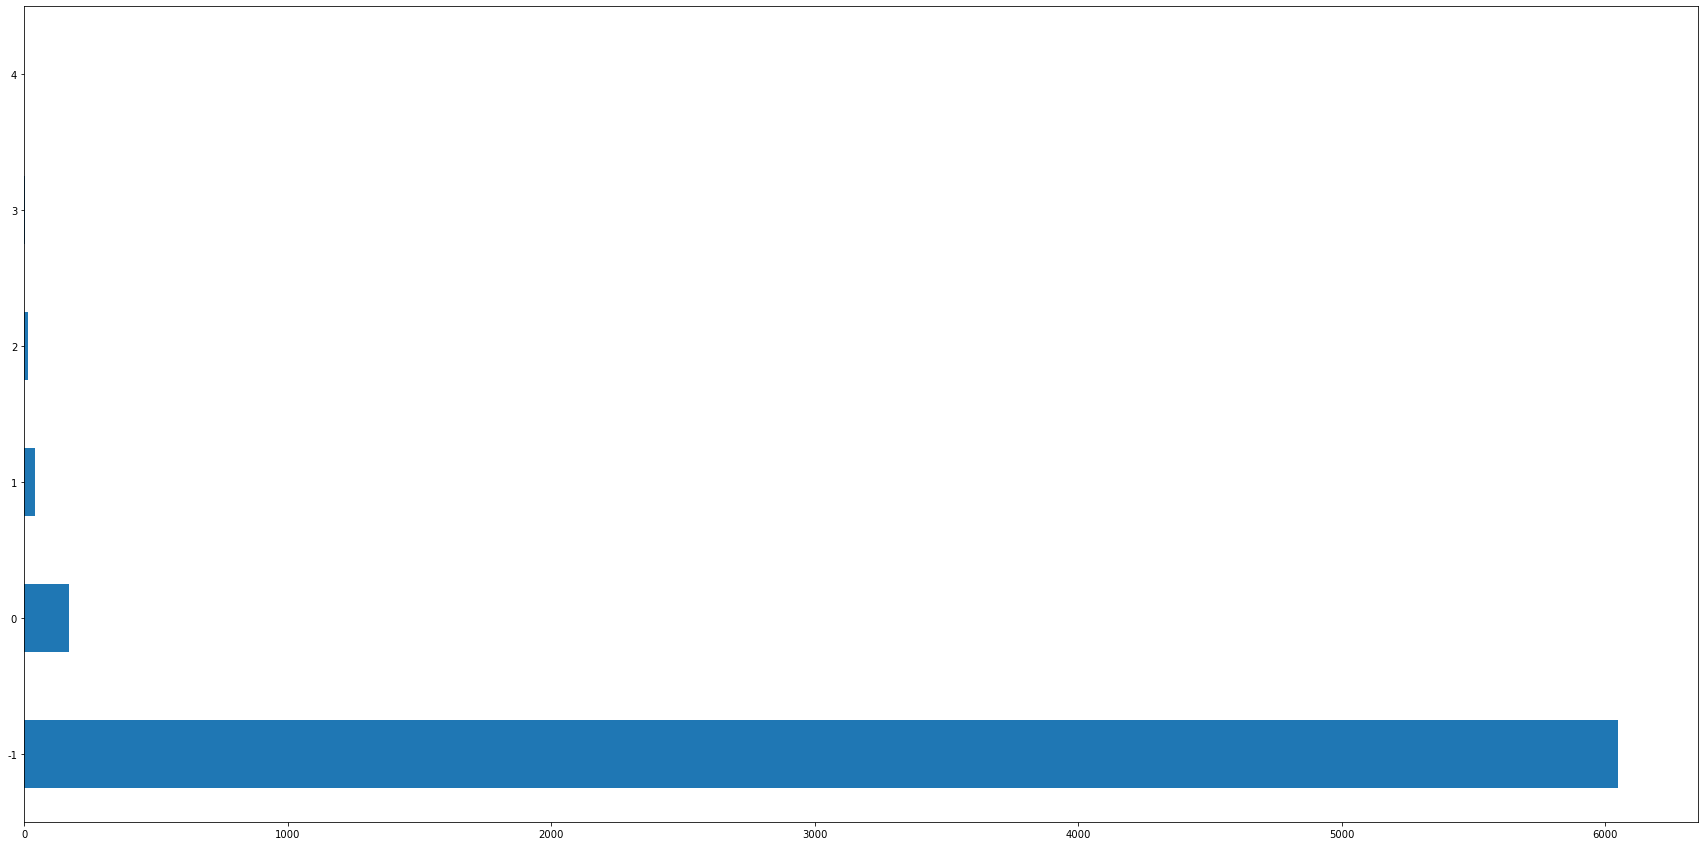

In [20]:
df['invests'] = np.log(df['invested_companies'])
df['invests'].replace({-float('inf'):-1}, inplace=True)
df["invests"] = df["invests"].apply(np.int64)
df['invests'].value_counts().plot(kind='barh', figsize=(30,15))

In [21]:
df.corr()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log,mls_log,mls,invested,invests
category_code,1.000000,-0.003429,-0.005530,0.004241,-0.000103,-0.000369,-0.080457,-0.039601,0.013580,0.004820,-0.020905,0.022903,0.018432,-0.016062,-0.006996
status,-0.003429,1.000000,0.033265,-0.001035,0.042524,0.043376,-0.100782,0.034708,0.104563,0.073845,0.144959,0.095542,0.103753,0.091253,0.082611
country_code,-0.005530,0.033265,1.000000,0.025638,0.002461,0.002522,-0.000812,-0.010957,-0.015500,0.002254,0.004228,-0.020566,-0.016569,0.005614,0.004959
state_code,0.004241,-0.001035,0.025638,1.000000,0.011565,0.011037,0.064429,0.014424,0.102594,0.027962,0.091045,0.100124,0.105635,0.013118,0.014439
investment_rounds,-0.000103,0.042524,0.002461,0.011565,1.000000,0.995288,-0.013151,0.042975,0.139090,0.496816,0.232910,0.105335,0.113340,0.438349,0.741100
invested_companies,-0.000369,0.043376,0.002522,0.011037,0.995288,1.000000,-0.013288,0.041200,0.138645,0.511868,0.236635,0.105912,0.113892,0.449338,0.751632
funding_rounds,-0.080457,-0.100782,-0.000812,0.064429,-0.013151,-0.013288,1.000000,0.262099,0.321591,0.056511,0.313454,0.289585,0.304844,-0.043757,-0.033178
funding_total_usd,-0.039601,0.034708,-0.010957,0.014424,0.042975,0.041200,0.262099,1.000000,0.115127,0.106975,0.150069,0.099132,0.103952,0.087806,0.090007
milestones,0.013580,0.104563,-0.015500,0.102594,0.139090,0.138645,0.321591,0.115127,1.000000,0.274405,0.615223,0.924291,0.968178,0.190222,0.201861
relationships,0.004820,0.073845,0.002254,0.027962,0.496816,0.511868,0.056511,0.106975,0.274405,1.000000,0.440845,0.217667,0.225602,0.374483,0.524785


In [22]:
df['class_<1M'] = df['funding_total_usd']<1000000
df['class_<1M'].replace({False:1, True:0}, inplace=True)
df['class_<10M'] = df['funding_total_usd']<=10000000
df['class_<10M'].replace({False:1, True:0}, inplace=True)
df['class_<100M'] = df['funding_total_usd']<=100000000
df['class_<100M'].replace({False:1, True:0}, inplace=True)
df['class_<500M'] = df['funding_total_usd']<=500000000
df['class_<500M'].replace({False:1, True:0}, inplace=True)
df['class_<1B'] = df['funding_total_usd']<=1000000000
df['class_<1B'].replace({False:1, True:0}, inplace=True)

df['class'] = df['class_<1M']+df['class_<10M']+df['class_<100M']+df['class_<500M']+df['class_<1B']+1
del df['class_<1M']
del df['class_<10M']
del df['class_<100M']
del df['class_<500M']
del df['class_<1B']
df.head()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log,mls_log,mls,invested,invests,class
1,46646,1,46654,46654,0,0,0,0.0,0,6,1,-1,0,0,-1,1
2,46646,1,46654,46654,0,0,0,0.0,4,12,2,1,3,0,-1,1
13,46647,1,46654,46654,0,0,1,5000000.0,3,14,2,1,3,0,-1,2
18,46645,1,46654,46654,0,0,1,0.0,4,9,2,1,3,0,-1,1
56,46646,1,46654,46640,0,0,0,0.0,3,2,0,1,3,0,-1,1


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

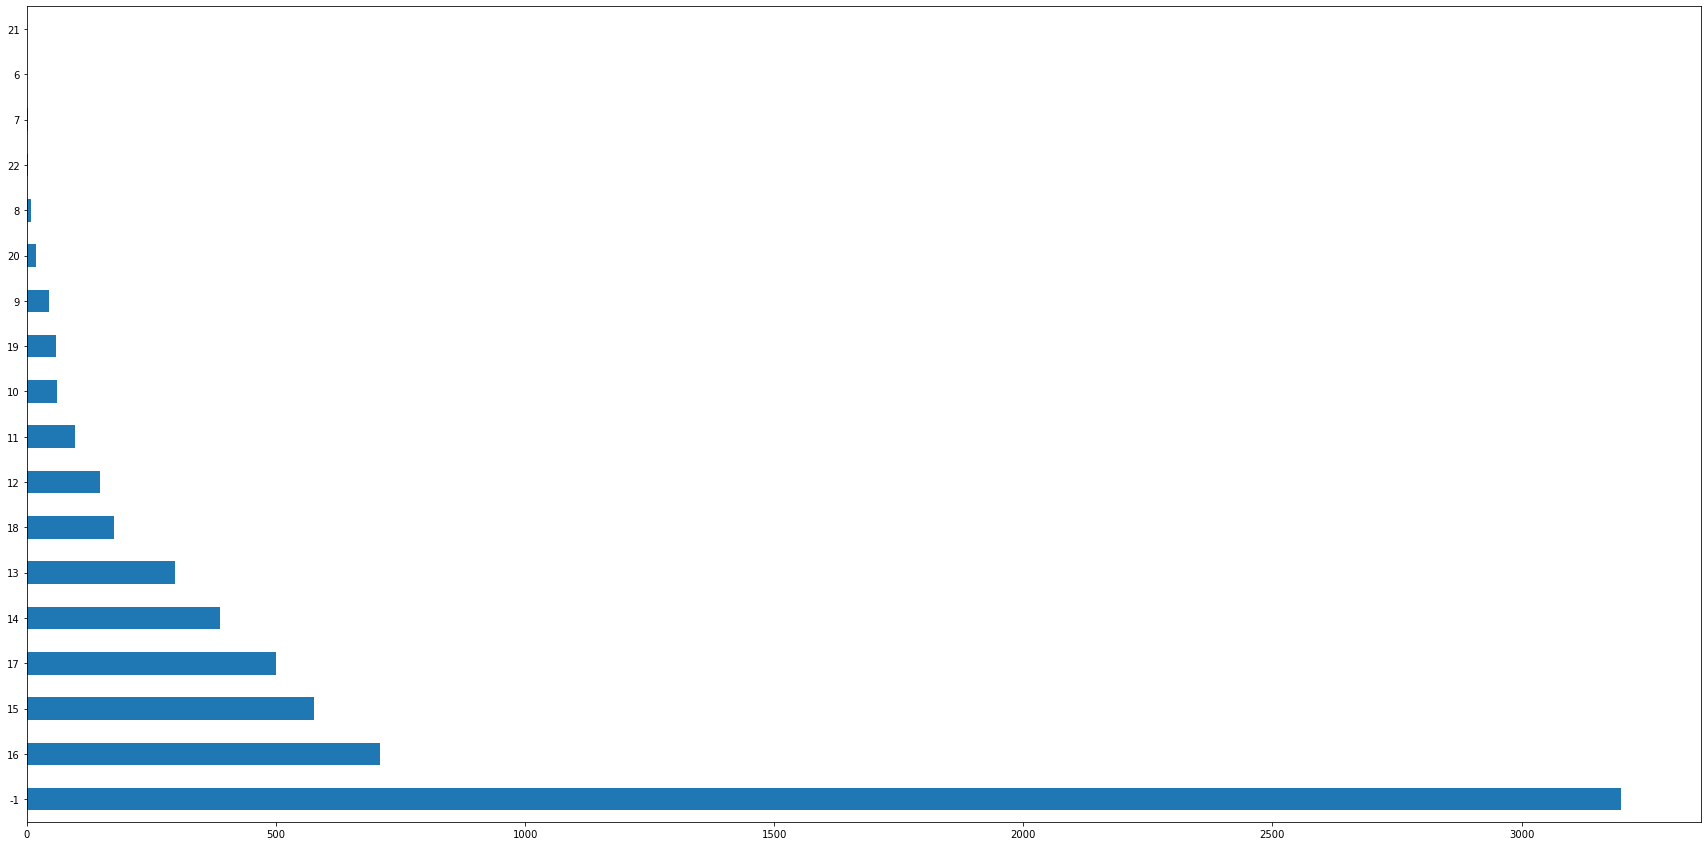

In [23]:
df['class_log'] = np.log(df['funding_total_usd'])
df['class_log'].replace({-float('inf'):-1}, inplace=True)
df["class_log"] = df["class_log"].apply(np.int64)
df['class_log'].value_counts().plot(kind='barh', figsize=(30,15))

<AxesSubplot:>

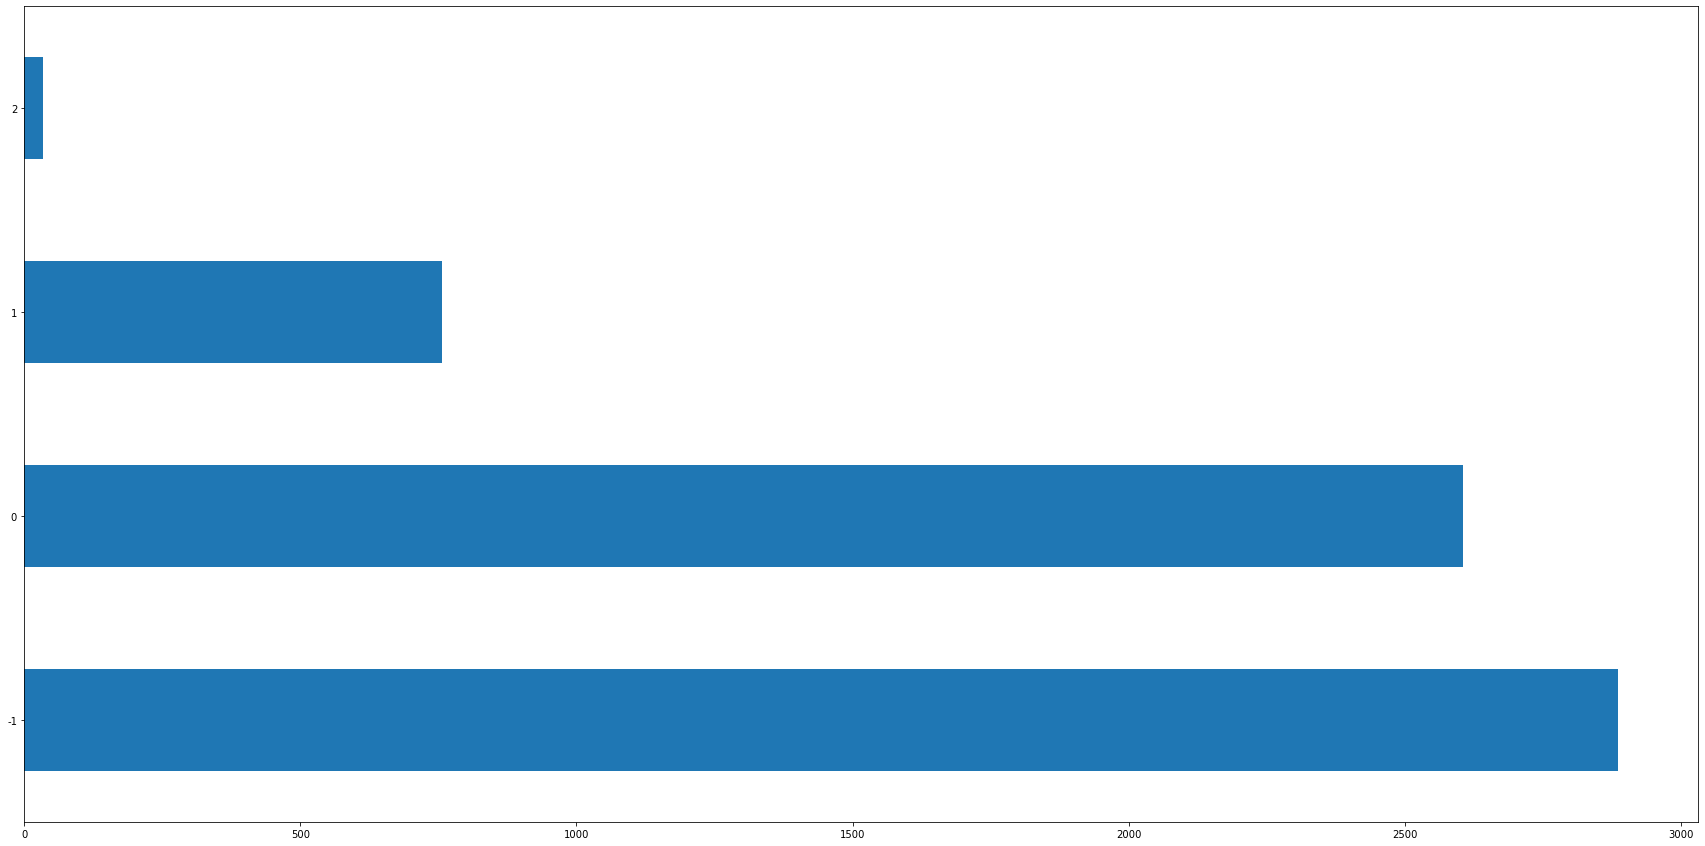

In [24]:
df['funding_rounds_log'] = np.log(df['funding_rounds'])
df['funding_rounds_log'].replace({-float('inf'):-1}, inplace=True)
df["funding_rounds_log"] = df["funding_rounds_log"].apply(np.int64)
df['funding_rounds_log'].value_counts().plot(kind='barh', figsize=(30,15))

In [25]:
df.corr()

,category_code,status,country_code,state_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,rel_log,mls_log,mls,invested,invests,class,class_log,funding_rounds_log
category_code,1.000000,-0.003429,-0.005530,0.004241,-0.000103,-0.000369,-0.080457,-0.039601,0.013580,0.004820,-0.020905,0.022903,0.018432,-0.016062,-0.006996,-0.102030,-0.081985,-0.082652
status,-0.003429,1.000000,0.033265,-0.001035,0.042524,0.043376,-0.100782,0.034708,0.104563,0.073845,0.144959,0.095542,0.103753,0.091253,0.082611,-0.004426,-0.201991,-0.217566
country_code,-0.005530,0.033265,1.000000,0.025638,0.002461,0.002522,-0.000812,-0.010957,-0.015500,0.002254,0.004228,-0.020566,-0.016569,0.005614,0.004959,-0.019543,-0.017079,-0.009740
state_code,0.004241,-0.001035,0.025638,1.000000,0.011565,0.011037,0.064429,0.014424,0.102594,0.027962,0.091045,0.100124,0.105635,0.013118,0.014439,0.076175,0.085028,0.078830
investment_rounds,-0.000103,0.042524,0.002461,0.011565,1.000000,0.995288,-0.013151,0.042975,0.139090,0.496816,0.232910,0.105335,0.113340,0.438349,0.741100,0.025522,0.006184,-0.011252
invested_companies,-0.000369,0.043376,0.002522,0.011037,0.995288,1.000000,-0.013288,0.041200,0.138645,0.511868,0.236635,0.105912,0.113892,0.449338,0.751632,0.023176,0.003599,-0.012516
funding_rounds,-0.080457,-0.100782,-0.000812,0.064429,-0.013151,-0.013288,1.000000,0.262099,0.321591,0.056511,0.313454,0.289585,0.304844,-0.043757,-0.033178,0.717187,0.712212,0.894817
funding_total_usd,-0.039601,0.034708,-0.010957,0.014424,0.042975,0.041200,0.262099,1.000000,0.115127,0.106975,0.150069,0.099132,0.103952,0.087806,0.090007,0.357667,0.194596,0.197165
milestones,0.013580,0.104563,-0.015500,0.102594,0.139090,0.138645,0.321591,0.115127,1.000000,0.274405,0.615223,0.924291,0.968178,0.190222,0.201861,0.261828,0.245996,0.299462
relationships,0.004820,0.073845,0.002254,0.027962,0.496816,0.511868,0.056511,0.106975,0.274405,1.000000,0.440845,0.217667,0.225602,0.374483,0.524785,0.073560,0.029303,0.029191


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[['category_code', 'country_code', 'state_code', 'funding_rounds_log', 'class_log', 'rel_log', 'mls_log', 'invested']], df['status'], test_size=0.3, random_state=100)

In [68]:
l,s=[],[]
for minsleaf in range(10,500,10):
    for maxDepth in range(5,50):
        clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=maxDepth, min_samples_leaf=minsleaf)
        clf_entropy.fit(X_train, y_train)
        y_pred_en = clf_entropy.predict(X_test)
        l.append(accuracy_score(y_test, y_pred_en)*100)
        if max(l)==accuracy_score(y_test, y_pred_en)*100:
            s=[minsleaf,maxDepth]

In [70]:
print(max(l), s)

84.72148541114059 [60, 7, 142]


In [71]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=142, max_depth=7, min_samples_leaf=60)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
print(accuracy_score(y_test, y_pred_en)*100)

84.72148541114059


In [82]:
from sklearn.neighbors import KNeighborsClassifier
N, k = 0, []
for n in range(5, 200,5):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    k.append(knn.score(X_test, y_test))
    if knn.score(X_test, y_test)==max(k):
        N=n
print(max(k)*100, N)

81.90981432360742 20


In [86]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(df[['category_code', 'country_code', 'state_code', 'funding_rounds_log', 'class_log', 'rel_log', 'mls_log', 'invested']], df['status'], test_size=0.3, random_state=100)
modele_regLog = linear_model.LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(X_train,y_train)
#précision du modèle
precision = modele_regLog.score(X_test,y_test)
print(precision*100)

79.09814323607426
